In [17]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

In [18]:

oil_price_data = pd.read_csv(r'C:\Users\befekadum\Documents\10x acadamy\week10\Change_point_analysis-\data\featured_oil_price_data.csv')
oil_price_data

,Date,Price,Year,Month,day
0,1987-05-20,18.63,1987,5,20
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,22
3,1987-05-25,18.60,1987,5,25
4,1987-05-26,18.63,1987,5,26
...,...,...,...,...,...
9006,2022-11-08,96.85,2022,11,8
9007,2022-11-09,93.05,2022,11,9
9008,2022-11-10,94.25,2022,11,10
9009,2022-11-11,96.37,2022,11,11


In [19]:
from train_test_split import train_test_split
from Model_Selection import train_arima,train_garch

In [20]:
oil_price_data = oil_price_data.drop('Date',axis=1)

In [21]:
oil_price_data.dtypes

Price    float64
Year       int64
Month      int64
day        int64
dtype: object

data spliting get ready for model traianing 

In [22]:
train_data, test_data = train_test_split(oil_price_data)

Train-Test Split: 7208 training points, 1803 testing points.


In [25]:
arima_model = train_arima(train_data, (1, 1, 1))
garch_model = train_garch(train_data.diff().dropna(), (1, 1))

ARIMA model trained with order (1, 1, 1)
GARCH model trained with order (1, 1)


In [26]:
from model_eva import evaluate_arima_model

evaluation of the models

ARIMA Model Evaluation:
MSE: 616.72, MAE: 18.48


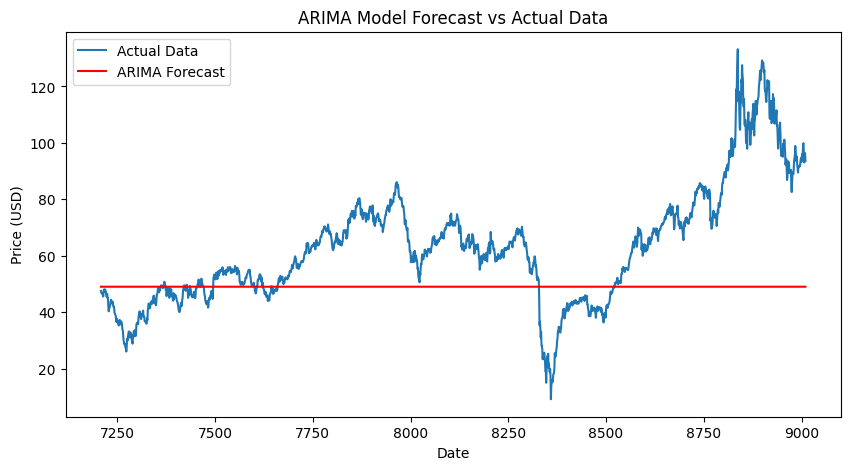

(np.float64(616.7243227547824), np.float64(18.484341205477442))

In [27]:
evaluate_arima_model(arima_model,test_data,train_data)

prediction

In [28]:
from forecasting import forecast_arima,forecast_garch

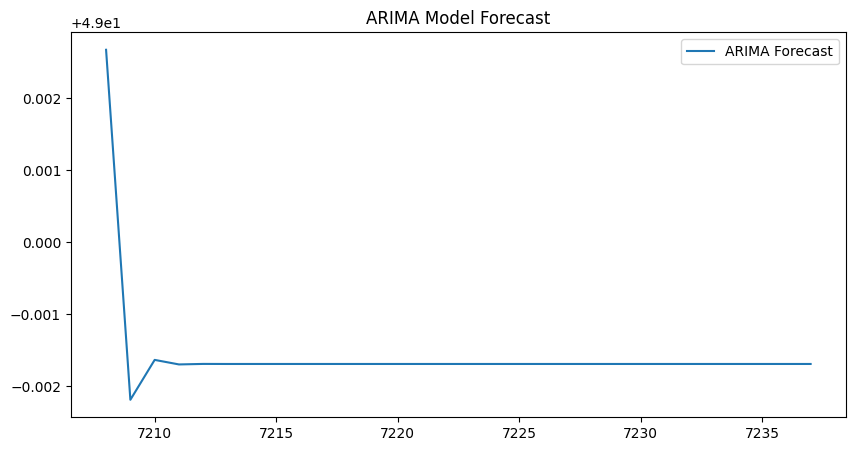

In [29]:
arima_forecast=forecast_arima(arima_model,30)

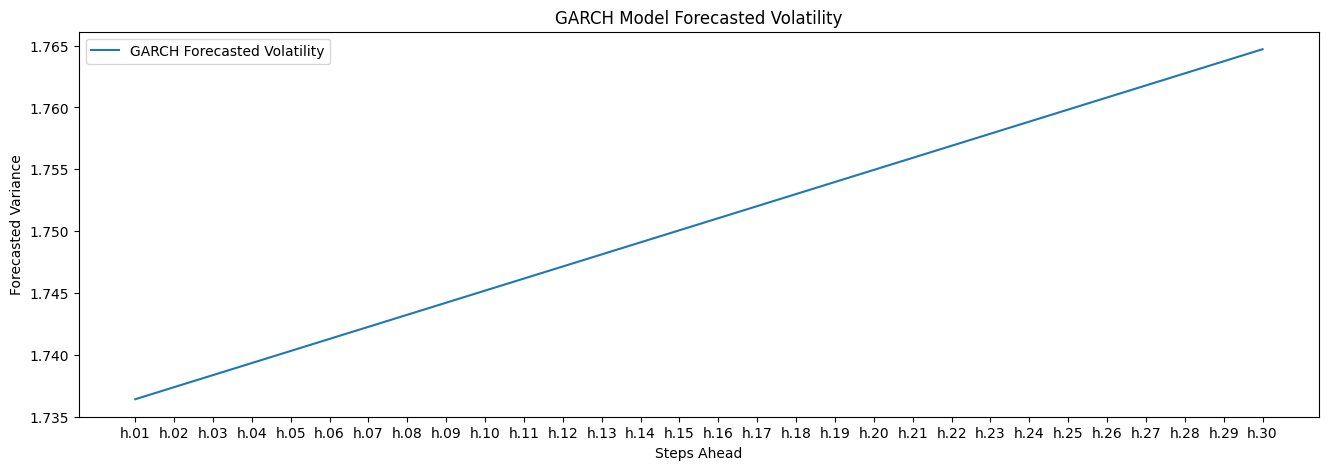

h.01    1.736414
h.02    1.737389
h.03    1.738365
h.04    1.739340
h.05    1.740316
h.06    1.741291
h.07    1.742267
h.08    1.743242
h.09    1.744218
h.10    1.745193
h.11    1.746169
h.12    1.747144
h.13    1.748120
h.14    1.749095
h.15    1.750071
h.16    1.751046
h.17    1.752022
h.18    1.752997
h.19    1.753972
h.20    1.754948
h.21    1.755923
h.22    1.756899
h.23    1.757874
h.24    1.758850
h.25    1.759825
h.26    1.760801
h.27    1.761776
h.28    1.762752
h.29    1.763727
h.30    1.764703
Name: 7207, dtype: float64

In [30]:
forecast_garch(garch_model,30)

In [31]:
from reporting import plot_final_forecast

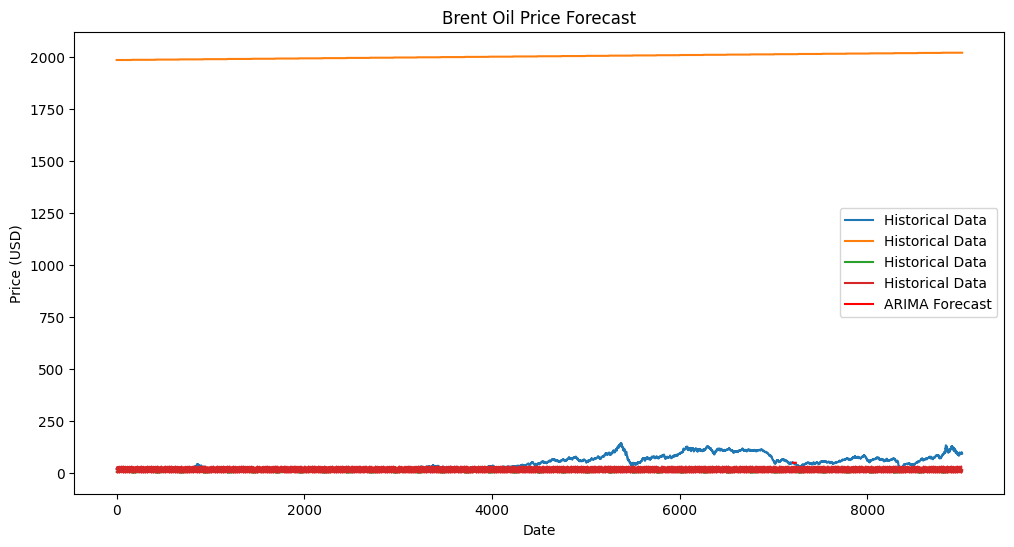

In [32]:
plot_final_forecast(oil_price_data, arima_forecast, garch_forecast=None)